#UTS-Nomer 04-10219081-Axel Farrel Hutagalung

1. For $f\left(x\right)=\sin x$ and $0\le x\le \pi$ make code to calculate area below the curve using rectangle left point, rectangle mid point, rectangle right point, trapezium, and Simpson method for 10 partition. Explain which method gives the best result. What is the analytical solution of the problem? Name each method with different function, e.g rectl(), rectm(), rectr(), trapez(), and simpson() with xbeg, xend, partition as parameters.

In [6]:
import math

def f(x):
    return math.sin(x)

def rectl(xbeg, xend, partition):
    dx = (xend - xbeg) / partition
    area = 0
    for i in range(partition):
        area += f(xbeg + i * dx) * dx
    return area

def rectm(xbeg, xend, partition):
    dx = (xend - xbeg) / partition
    area = 0
    for i in range(partition):
        area += f(xbeg + (i + 0.5) * dx) * dx
    return area

def rectr(xbeg, xend, partition):
    dx = (xend - xbeg) / partition
    area = 0
    for i in range(partition):
        area += f(xbeg + (i + 1) * dx) * dx
    return area

def trapez(xbeg, xend, partition):
    dx = (xend - xbeg) / partition
    area = 0
    for i in range(partition):
        area += (f(xbeg + i * dx) + f(xbeg + (i + 1) * dx)) * dx / 2
    return area

def simpson(xbeg, xend, partition):
    dx = (xend - xbeg) / partition
    area = 0
    for i in range(partition):
        x1 = xbeg + i * dx
        x2 = xbeg + (i + 1) * dx
        xm = (x1 + x2) / 2
        area += (f(x1) + 4 * f(xm) + f(x2)) * dx / 6
    return area

xbeg = 0
xend = math.pi
partition = 10

recl = rectl(xbeg, xend, partition)
recm = rectm(xbeg, xend, partition)
recr = rectr(xbeg, xend, partition)
traps = trapez(xbeg, xend, partition)
simps = simpson(xbeg, xend, partition)

print("Analytical solution:", 2)
print("Rectangle left point method:", recl)
print("Rectangle mid point method:", recm)
print("Rectangle right point method:", recr)
print("Trapezium method:", traps)
print("Simpson method:", simps)

print("Best method can be determine from error")
errl = (abs(recl-2)/2)*100
errm = (abs(recm-2)/2)*100
errr = (abs(recr-2)/2)*100
errt = (abs(traps-2)/2)*100
errs = (abs(simps-2)/2)*100

print("Error from Rectangle left point method: ", errl)
print("Error from Rectangle mid point method: ", errm)
print("Error from Rectangle right point method: ", errr)
print("Error from Trapezium method: ", errt)
print("Error from Simpson method: ", errs)
print("The best method that give best result is Simpson method")

Analytical solution: 2
Rectangle left point method: 1.9835235375094544
Rectangle mid point method: 2.0082484079079745
Rectangle right point method: 1.9835235375094544
Trapezium method: 1.9835235375094546
Simpson method: 2.0000067844418012
Best method can be determine from error
Error from Rectangle left point method:  0.8238231245272787
Error from Rectangle mid point method:  0.4124203953987271
Error from Rectangle right point method:  0.8238231245272787
Error from Trapezium method:  0.8238231245272676
Error from Simpson method:  0.0003392220900622078
The best method that give best result is Simpson method


2. Using Finite Difference Method (FDM) find plot the curve of vertical position againts time for a free fall motion if $ y_{0}= 10 m$, $y_{t} = -10 m/s^2$ , with number of grid $n = 10, 20, 40, 80, 160$ by modifying a code. Explain the form of the curve. Which  gives better result?

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


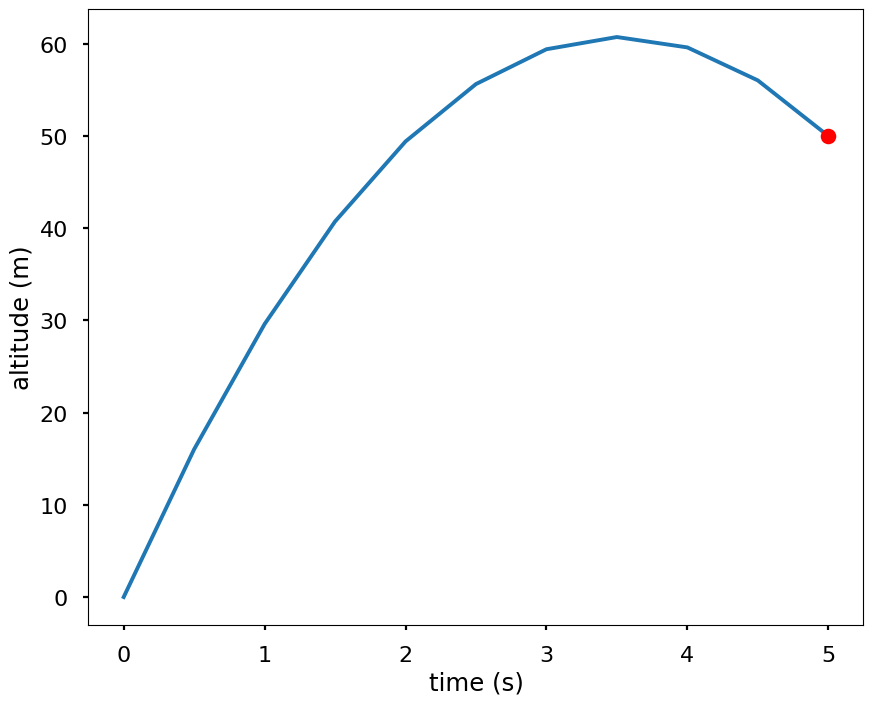

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
h = (5-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 5, 11)

plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

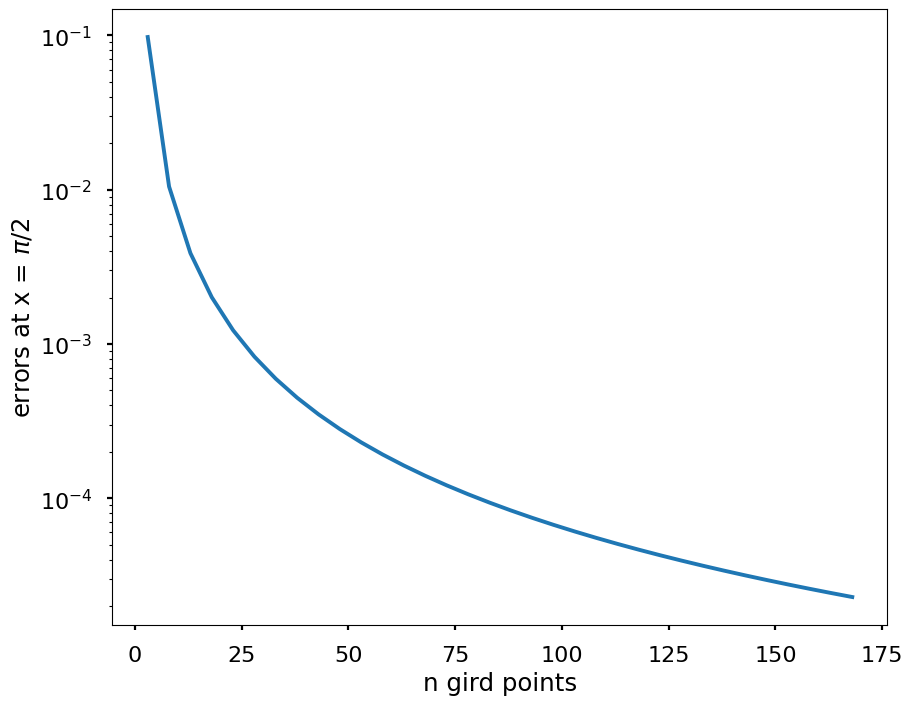

In [10]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 170, 5):
    x, A, b = get_a_b(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)
    
plt.figure(figsize = (10,8))
plt.plot(n_s, errors)
plt.yscale('log')
plt.xlabel('n gird points')
plt.ylabel('errors at x = $\pi/2$')
plt.show()

In [ ]:
The best result is with 160 grid points. As we can see, the more grid we use the lower the error.